This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6259 - accuracy: 0.8125 - val_loss: 0.2435 - val_accuracy: 0.9293
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2422 - accuracy: 0.9247 - val_loss: 0.1889 - val_accuracy: 0.9419
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1549 - accuracy: 0.9521 - val_loss: 0.1466 - val_accuracy: 0.9553
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1120 - accuracy: 0.9649 - val_loss: 0.1778 - val_accuracy: 0.9461
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9740 - val_loss: 0.2099 - val_accuracy: 0.9402
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.1391 - val_accuracy: 0.9616
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.1297 - val_accuracy: 0.9670
Epoch 

**Plotting a validation accuracy comparison**

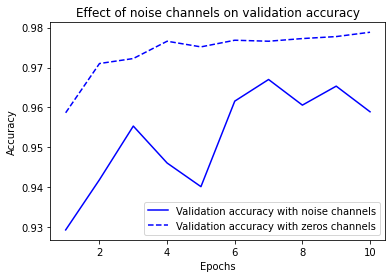

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3173 - accuracy: 0.1029 - val_loss: 2.3046 - val_accuracy: 0.1068
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.3004 - accuracy: 0.1155 - val_loss: 2.3115 - val_accuracy: 0.1023
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2908 - accuracy: 0.1291 - val_loss: 2.3180 - val_accuracy: 0.1028
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2772 - accuracy: 0.1395 - val_loss: 2.3241 - val_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2620 - accuracy: 0.1510 - val_loss: 2.3398 - val_accuracy: 0.1027
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2406 - accuracy: 0.1662 - val_loss: 2.3470 - val_accuracy: 0.1018
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2179 - accuracy: 0.1819 - val_loss: 2.3586 - val_accuracy: 0.1095

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 857.9833 - accuracy: 0.3525 - val_loss: 2.1947 - val_accuracy: 0.2313
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 10.1489 - accuracy: 0.2442 - val_loss: 2.0207 - val_accuracy: 0.2555
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8578 - accuracy: 0.2413 - val_loss: 2.3391 - val_accuracy: 0.3085
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8448 - accuracy: 0.2374 - val_loss: 2.7577 - val_accuracy: 0.2767
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9949 - accuracy: 0.2405 - val_loss: 2.2089 - val_accuracy: 0.2197
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7809 - accuracy: 0.2341 - val_loss: 2.2785 - val_accuracy: 0.2853
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6572 - accuracy: 0.2670 - val_loss: 3.1901 - val_accuracy: 0.2936
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3769 - accuracy: 0.9099 - val_loss: 0.1326 - val_accuracy: 0.9621
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1435 - accuracy: 0.9625 - val_loss: 0.1676 - val_accuracy: 0.9631
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1207 - accuracy: 0.9721 - val_loss: 0.1994 - val_accuracy: 0.9632
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1077 - accuracy: 0.9770 - val_loss: 0.1709 - val_accuracy: 0.9705
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.9814 - val_loss: 0.2248 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9837 - val_loss: 0.2061 - val_accuracy: 0.9732
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9861 - val_loss: 0.2614 - val_accuracy: 0.9724
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6692 - accuracy: 0.8365 - val_loss: 0.3568 - val_accuracy: 0.9028
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9022 - val_loss: 0.3086 - val_accuracy: 0.9139
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.9124 - val_loss: 0.2915 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9165 - val_loss: 0.2824 - val_accuracy: 0.9223
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9190 - val_loss: 0.2769 - val_accuracy: 0.9219
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9211 - val_loss: 0.2724 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.9224 - val_loss: 0.2699 - val_accuracy: 0.9265
Epoch 

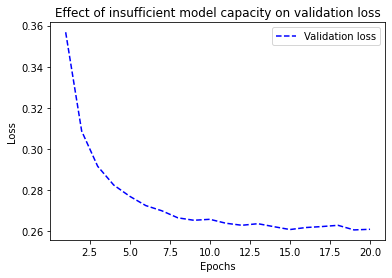

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3666 - accuracy: 0.8964 - val_loss: 0.1752 - val_accuracy: 0.9507
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1648 - accuracy: 0.9514 - val_loss: 0.1478 - val_accuracy: 0.9554
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9654 - val_loss: 0.1286 - val_accuracy: 0.9619
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0876 - accuracy: 0.9731 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0951 - val_accuracy: 0.9711
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 0.0920 - val_accuracy: 0.9738
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0988 - val_accuracy: 0.9720
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5065 - accuracy: 0.7919 - val_loss: 0.3799 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2972 - accuracy: 0.9057 - val_loss: 0.2967 - val_accuracy: 0.8908
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2209 - accuracy: 0.9244 - val_loss: 0.2822 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1687 - accuracy: 0.9481 - val_loss: 0.2737 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1385 - accuracy: 0.9574 - val_loss: 0.2816 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1141 - accuracy: 0.9643 - val_loss: 0.3044 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0926 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6399 - accuracy: 0.6535 - val_loss: 0.5995 - val_accuracy: 0.7381
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5655 - accuracy: 0.7647 - val_loss: 0.5576 - val_accuracy: 0.7447
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5203 - accuracy: 0.8159 - val_loss: 0.5260 - val_accuracy: 0.7996
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4847 - accuracy: 0.8537 - val_loss: 0.5056 - val_accuracy: 0.8092
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4552 - accuracy: 0.8789 - val_loss: 0.4855 - val_accuracy: 0.8632
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4315 - accuracy: 0.9003 - val_loss: 0.4737 - val_accuracy: 0.8524
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4104 - accuracy: 0.9127 - val_loss: 0.4643 - val_accuracy: 0.8595
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5412 - accuracy: 0.7509 - val_loss: 0.4648 - val_accuracy: 0.7851
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2551 - accuracy: 0.8981 - val_loss: 0.2651 - val_accuracy: 0.8950
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1630 - accuracy: 0.9381 - val_loss: 0.2872 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0934 - accuracy: 0.9709 - val_loss: 0.4328 - val_accuracy: 0.8561
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0909 - accuracy: 0.9769 - val_loss: 0.3056 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0074 - accuracy: 0.9997 - val_loss: 0.5203 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0614 - accuracy: 0.9925 - val_loss: 0.9994 - val_accuracy: 0.8215
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5928 - accuracy: 0.7752 - val_loss: 0.4573 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3918 - accuracy: 0.8944 - val_loss: 0.4246 - val_accuracy: 0.8549
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3248 - accuracy: 0.9160 - val_loss: 0.3648 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2943 - accuracy: 0.9253 - val_loss: 0.3546 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2753 - accuracy: 0.9326 - val_loss: 0.3560 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2642 - accuracy: 0.9380 - val_loss: 0.3580 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2453 - accuracy: 0.9441 - val_loss: 0.3655 - val_accuracy: 0.8815
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6290 - accuracy: 0.6433 - val_loss: 0.5237 - val_accuracy: 0.8484
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5095 - accuracy: 0.7717 - val_loss: 0.4174 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4359 - accuracy: 0.8244 - val_loss: 0.3606 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3804 - accuracy: 0.8607 - val_loss: 0.3178 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3317 - accuracy: 0.8885 - val_loss: 0.2939 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2967 - accuracy: 0.9026 - val_loss: 0.2892 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2696 - accuracy: 0.9142 - val_loss: 0.2787 - val_accuracy: 0.8868
Epoch 8/20
30

## Summary